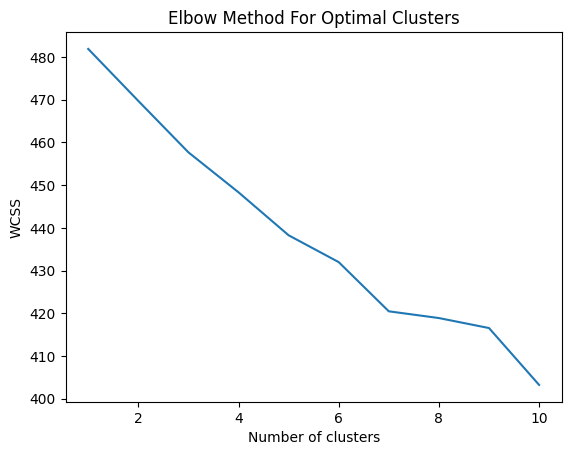

Silhouette Score: 0.06873972210783094
Recommended Products based on your search:
                                                title category  \
0   LANEIGE Lip Glowy Balm Stocking Stuffer: Hydra...   beauty   
1   LANEIGE Lip Sleeping Mask Stocking Stuffer: No...   beauty   
2   Elizabeth Arden Retinol + HPR Ceramide Capsule...   beauty   
3   U Beauty - The U Beauty Duo - Resurfacing Comp...   beauty   
21  Face Serum | Anti-Aging Corrector for Wrinkles...   beauty   

                                          description  
0   laneige lip glowy balm stocking stuffer hydrat...  
1   laneige lip sleeping mask stocking stuffer nou...  
2   sponsored ad elizabeth arden retinol hpr ceram...  
3   sponsored ad u beauty u beauty duo resurfacing...  
21  sponsored ad le domaine face serum antiaging c...  


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Load the data from the JSON file and show products
products = pd.read_json('../cleaning/products.json')

# Step 2: Combine 'category' and 'description' into one feature
products['combined'] = products['category'] + " " + products['description']

# Step 3: Preprocess the combined text with TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(products['combined'])  # Convert combined feature to TF-IDF

# Step 4: Use the Elbow Method to find the optimal number of clusters
def plot_elbow_method(X):
    wcss = []  # within-cluster sum of squares
    for i in range(1, 11):  # Try different numbers of clusters (1 to 10)
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method For Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Plot the elbow method to decide on the optimal number of clusters
plot_elbow_method(X)

# Step 5: Apply KMeans clustering with the optimal number of clusters (using Elbow Method results)
n_clusters = 10 # For example, you could choose 5 after evaluating the elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
products['cluster'] = kmeans.labels_  # Assign cluster labels to each product

# Step 6: Evaluate clustering with silhouette score (higher is better)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Step 7: Allow user to input search words
search_words = "nails red"  # Example search term
search_vector = vectorizer.transform([search_words])  # Convert search words to a vector

# Step 8: Find the most similar cluster
cluster_centroids = kmeans.cluster_centers_
similarities = cosine_similarity(search_vector, cluster_centroids)
most_similar_cluster = np.argmax(similarities)  # Get the index of the most similar cluster

# Step 9: Get recommended products from the identified cluster
recommended_products = products[products['cluster'] == most_similar_cluster].head(5)  # Recommend top 5 products

# Step 10: Display the recommended products
print("Recommended Products based on your search:")
print(recommended_products[['title', 'category', 'description']])


In [40]:
# --- DBSCAN Clustering ---
# Step 5: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X)  # Fit the model and predict cluster labels

# Step 6: Assign cluster labels to the products
products['cluster_dbscan'] = dbscan_labels  # -1 indicates outliers/noise

# Step 7: Evaluate clustering with silhouette score
silhouette_avg_dbscan = silhouette_score(X, dbscan_labels)  # Silhouette score may not be as useful with DBSCAN due to noise
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")
# Step 8: Find the most similar cluster using DBSCAN (ignoring noise/outliers with -1)
search_similarities_dbscan = cosine_similarity(search_vector, X)  # Compare the search term to all product vectors
most_similar_product_dbscan = np.argmax(search_similarities_dbscan)  # Get the index of the most similar product

# Step 9: Get recommended products
recommended_products_dbscan = products.iloc[[most_similar_product_dbscan]].head(5)  # Recommend the most similar product (top 1)

# Step 10: Display the recommended products (DBSCAN)
print("Recommended Products based on your search (DBSCAN):")
print(recommended_products_dbscan[['title', 'category']])


Silhouette Score (DBSCAN): -0.00032322570185650175
Recommended Products based on your search (DBSCAN):
                                                 title category
147  Cuccio Naturale Revitalizing- Hydrating Oil Fo...    nails


In [42]:
# --- Gaussian Mixture Models (GMM) ---
# Step 5: Apply Gaussian Mixture Model clustering
n_components = 10  # Choose the number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(X.toarray())  # GMM needs the data in dense format

# Step 6: Assign cluster labels to the products
products['cluster_gmm'] = gmm_labels

# Step 7: Evaluate clustering with silhouette score
silhouette_avg_gmm = silhouette_score(X, gmm_labels)  # Silhouette score to evaluate GMM clustering
print(f"Silhouette Score (GMM): {silhouette_avg_gmm}")

# Step 8: Find the most similar cluster using GMM
search_similarities_gmm = cosine_similarity(search_vector, X)  # Compare the search term to all product vectors
most_similar_product_gmm = np.argmax(search_similarities_gmm)  # Get the index of the most similar product

# Step 9: Get recommended products from GMM clustering
recommended_products_gmm = products.iloc[[most_similar_product_gmm]].head(5)  # Recommend top 1 product

# Step 10: Display the recommended products (GMM)
print("Recommended Products based on your search (GMM):")
print(recommended_products_gmm[['title', 'category', 'description']])

Silhouette Score (GMM): 0.07723909777047208
Recommended Products based on your search (GMM):
                                                 title category  \
147  Cuccio Naturale Revitalizing- Hydrating Oil Fo...    nails   

                                           description  
147  cuccio naturale revitalizing hydrating oil rep...  


In [43]:
print(f"Silhouette Score (KMeans): {silhouette_avg}")
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")
print(f"Silhouette Score (GMM): {silhouette_avg_gmm}")

# You can also display the cluster count for each algorithm
print(f"Number of clusters (KMeans): {n_clusters}")
print(f"Number of clusters (DBSCAN): {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Number of clusters (GMM): {n_components}")

Silhouette Score (KMeans): 0.07723054160800924
Silhouette Score (DBSCAN): -0.00032322570185650175
Silhouette Score (GMM): 0.07723909777047208
Number of clusters (KMeans): 10
Number of clusters (DBSCAN): 9
Number of clusters (GMM): 10
